In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

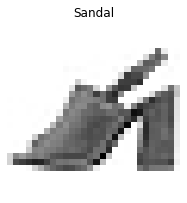

In [4]:
import random
plt.figure(figsize=(7, 7))
for i in range(1):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)
  
train_data = train_data / 255.0
test_data = test_data / 255.0

In [5]:
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(45, activation="relu"),
  tf.keras.layers.Dense(35, activation="relu"),
  tf.keras.layers.Dense(23, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(tf.expand_dims(train_data, axis=-1),
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5447 - accuracy: 0.8092 - val_loss: 0.4438 - val_accuracy: 0.8442
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3984 - accuracy: 0.8560 - val_loss: 0.4420 - val_accuracy: 0.8415
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3625 - accuracy: 0.8665 - val_loss: 0.4378 - val_accuracy: 0.8341
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3401 - accuracy: 0.8744 - val_loss: 0.3946 - val_accuracy: 0.8572
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3246 - accuracy: 0.8796 - val_loss: 0.3889 - val_accuracy: 0.8598
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3110 - accuracy: 0.8840 - val_loss: 0.4162 - val_accuracy: 0.8436
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3012 - accuracy: 0.8895 - val_loss: 0.3732 - val_accurac

In [6]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

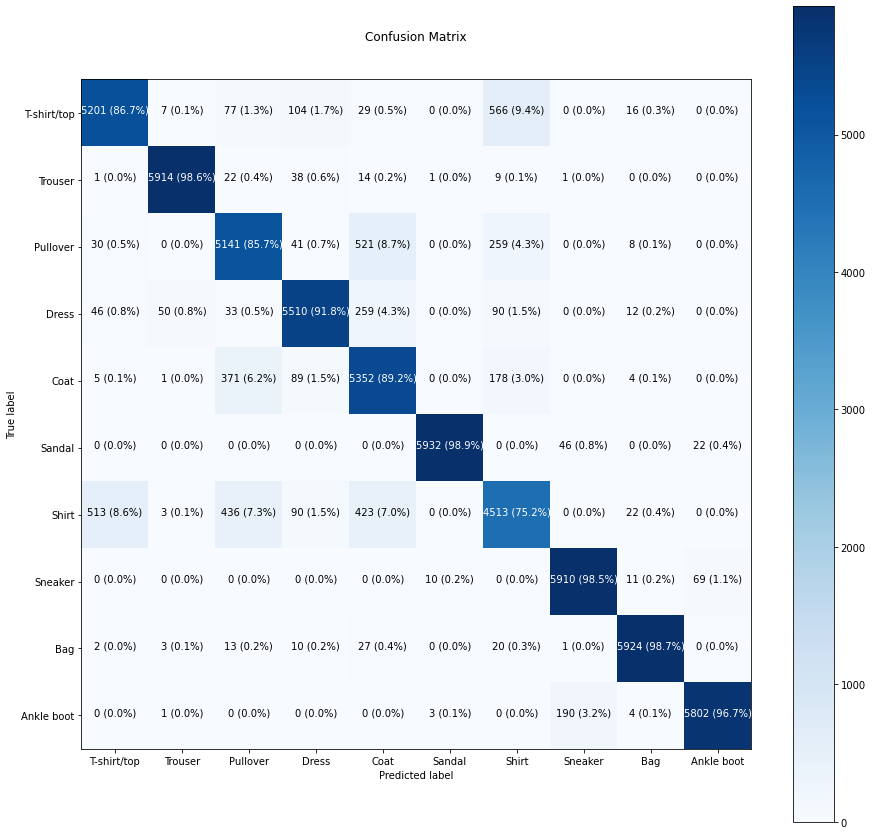

In [7]:
from sklearn.metrics import confusion_matrix

x_probs = model_14.predict(train_data) # "probs" is short for probabilities

x_probs[0].argmax(), class_names[x_probs[0].argmax()]
x_preds = x_probs.argmax(axis=1) 

make_confusion_matrix(y_true=train_labels, 
                      y_pred=x_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [8]:
def plot_random_image(model, images, true_labels, classes):
 num=4
 plt.figure(figsize=(2,2))
 for k in range(num):
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]

  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                100*tf.reduce_max(pred_probs),
                                                true_label),
                          color=color) # set the color to green or red

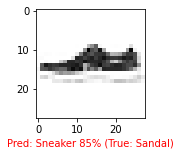

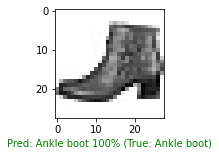

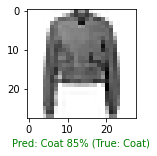

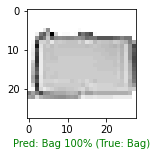

In [9]:
for i in range(4):
  plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)